<a href="https://colab.research.google.com/github/Jetsukda/Deep-Learning-with-Python/blob/main/2.%20Before%20we%20begin%3A%20the%20mathematical%20building%20blocks%20of%20neural%20networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 A first look at a neural network

>Note on **classes** and **labels**

- In machine learning, a **category** in a classification problem is called a ***class***.
- **Data points** are called ***samples***.
- The **class associated** with a  specific sample is called a ***label***.

Let's look at a concrete example of neural network that uses the Python library Keras to learn to classify handwritten digits. Unless you already have experience with Keras or similar libaries, you won't understand everything about this first example tight away.

> **Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step



- `train_images` and `train_labels` form **training set**
- `test_images` and `test_images` form **test set**
- The images are encoded as NumPy arrays, and the labels are an array of digits, ranging from 0 to 9.
- The images and labels have one-to-one correspondence.

In [2]:
# (number of image, rows, cols) -> row x col = images size = 28x28 Pixel.
train_images.shape

(60000, 28, 28)

In [3]:
# 60,000 images.
len(train_images)

60000

In [4]:
# labels range from 0 to 9.
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

And here's the test data

In [5]:
# (number of image, rows, cols) -> row x col = images size = 28x28 Pixel.
test_images.shape

(10000, 28, 28)

In [6]:
# 10,000 images.
len(test_images)

10000

In [7]:
# labels range from 0 to 9.
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

> **The workflow will be as follows**:
- First, we'll feed the neural network the training data, `train_images`, `train_labels`.
- The network will then learn to associate images and labels.
- Finally, we'll ask the network to product predictions for `test_images`, and we'll verify whether these predictions match the labels from `test_labels`.

> **The network architecture**

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [9]:
network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
network.add(layers.Dense(10, activation="softmax"))

The core building block of neural network is the `layer`, **data-processing** module that you can think of as a **filter for data**. Some data goes in, and it comes out in more useful form.

Specifically, layers exteact **representations** out of the data feed into them hopefully from, representations that are more meaningful for the problem as hand.

Most of deep learning consists of chaining together simple layers that will implement a form of progressive **data distillation**.

A deep learning model is like a sieve for data processing, made of succession of increasingly refined data filters - the layers.
- **Dense Layers**: Which are densely connected (also caleed **fully connected**) neural layers.
    - The last layer is **10-way softmax** layer, which means it will return an array of 10 probability scores (summing to 1).

        \begin{equation}
        \sigma(z)_i  = \frac{exp(z_i)}{\sum_{j}^{ }exp(z_j))}
        \end{equation}
        <p align="center">
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png" width="700" >
        <figcaption align="center">Fig1. Softmax</figcaption>
        </p>
        
    - The last layer is **10-way softmax** layer, which means it will return an array of 10 probability scores (summing to 1).
- To make the network ready for training, we need to pick three more things, as part of the **compilation** step:
    - **Loss function** - How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in thr right direction.
    - **Optimizer** - The mechanism through which the network will update itself based on the data it sees ans its **loss function**
    - **Metrics to monitor during training and testing** - Here, we'll only care about accuracy(the fraction of the images that were correctly classified).


> **The compilation step**

In [10]:
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

> **Preparing the image data**

In [11]:
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype("float32")/255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype("float32")/255

*We also need to categorically encode the labels, a step that's explained in chapter 3.

> **Preparing the labels**

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We're now ready to train the network, which in Keras is done to the network's fit method - we fit the model to its training data

In [14]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2549 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1033 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0688 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0505 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0389 - accuracy: 0.9886


# 2.2 Data representations for neural networks


- Multidimensional NumPy arrays(**`tensors`**): Container for numbers.
- In general, all current machine learning system use tensors as their **basic data structure**.
- Tensors are a generalization of matrices to an arbitrary number of dimensions
    - A **dimension** is often called an **axis**

        <p align="center">
        <img src="https://cdn-images-1.medium.com/max/800/1*pUr-9ctuGamgjSwoW_KU-A.png" width="700" >
        </p>


## 2.2.1 Scalars (0D Tensors)

- A tensor that contains only number.
- In NumPy, a `float32` or `float64` number is a scalar tensor (or scalar array)
- a scalar tensor has 0 axes (ndim == 0).
- The number of axes of a tensor is also called its rank.

In [15]:
import numpy as np

In [16]:
# Here's a NumPy scalar
x = np.array(12)

In [17]:
x

array(12)

In [18]:
x.ndim

0

## 2.2.2 Vector (1D tensors)

- An array of numbers iss caleed a ***vector*** or ***1D tensor***
- have one axis

In [19]:
x = np.array([12, 3, 6, 14])

In [20]:
x

array([12,  3,  6, 14])

In [21]:
x.ndim

1

- This vector has five entries and so id called a ***5-dimensional vertor***.
- Dont' confuse a **5D vector** with a **5D tensor**!
    - 5D vector has only one axis and have five dimensions along its axis
    - 5D tensor has five axis (and may have any number of dimensions along each axis).
- **Dimensional** can denote either **the number of entries along a spaceific axis** or **the number of axes in tensor**

## 2.2.3 Matrices (2D tensors)


- An array of vector is a ***matrix*** or ***2D tensor***.
- has two axes (often referred to rows and columns).

In [22]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [23]:
x.ndim

2

- first axis are called the ***rows***.
- second axis are called the ***columns***.

In the previous example
- `[5, 78, 2, 34, 0]` is the first row of x
- `[5, 6, 7]` is the first column.

## 2.2.4 3D tensor and higher-dimensional tensors


- pack of matrices in a ner array.
- which you can visually interpret as a cube of numbers.
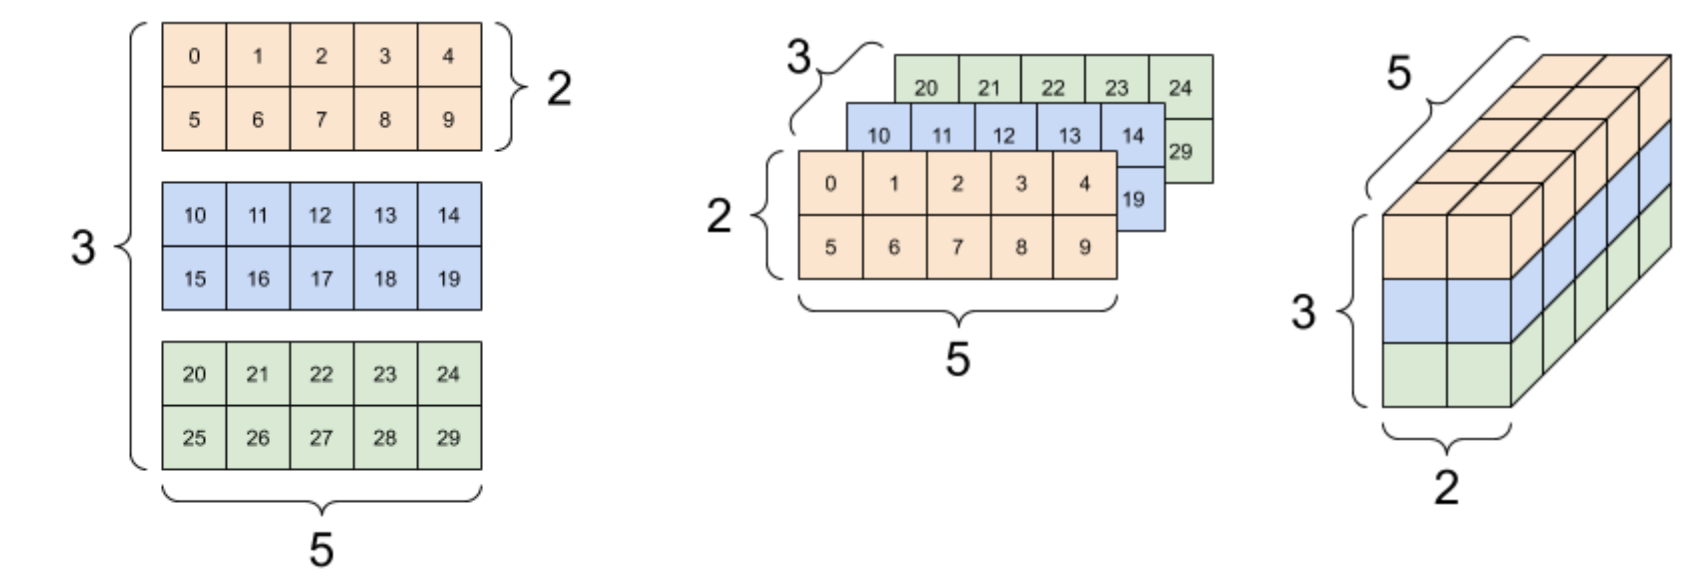



In [24]:
x = np.array([
              [[0, 1, 2, 3, 4],
               [5, 6, 7, 8, 9]],
              [[10, 11, 12, 13, 14],
               [15, 16, 17, 18, 19]],
              [[20, 21, 22, 23, 24],
               [25, 26, 27, 28, 29]]
             ])

In [25]:
x.ndim

3

> By packing 3D tensors in an array, you can create a 4D tensor, and so on. In deep learning, you'll generally manipulate tensors that are 0D to 4D, although you may go up to 5D if you process video data.

## 2.2.5 Key attributes

> A tensor is defined by three key attributes:
- Number of axes (rank)
- Shape
- Data type (dtype in Python libraries)

- tensor's type could be 
    - `float32`
    - `uint8`
    - `float64`

> **let's look back at the date**


We processed in `MNIST dataset` example. First, we load the `MNIST dataset`

In [26]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Next, we display the numeber of `axes` of the tensor `train_images`

In [27]:
# the ndim attribute
train_images.ndim

3

In [28]:
# here's its shape
train_images.shape

(60000, 28, 28)

In [29]:
# data type(dtype)
train_images.dtype

dtype('uint8')

So what we have here is a `3D tensor` of `8-bit integers`

- it's an array of 60,000 matrices of 28x28 integers.
- Each such matrix is a grayscale image, with coefficients between 0 and 255.

> **Let's display the fourth digit in this 3D tensor**

In [30]:
import matplotlib.pyplot as plt

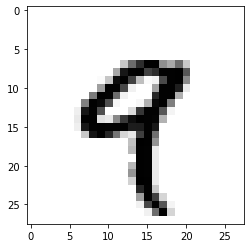

In [31]:
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## 2.2.6 Manipulating tensors in NumPy

In [32]:
# tensor slicing selects digits #10 to #100 (#100 is'n included)
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

It's equivalent to this more detailed nation
- specifies a start index and stop index for slice along each tensor axis.

***Note that `:` is equivalent to selecting the entire axis:**

In [33]:
# Equivalent to the previous example
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [34]:
# Also equivalent to the previous example
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In genral, you may select between any two indices alnog axis.

In [35]:
# select 14x14 pixels in the bottom-right corner of all images
my_slice = train_images[:, 14:, 14:]

In [36]:
# negative indices
my_slice = train_images[:, 7:-7, 7:-7]

## 2.2.7 The notion of data batches

> In general, the first axis (axis 0) is all data tensors you'll come across in deep learning will be the ***samples axis (samples dimension)***

> In addition, deep learning models don't processs an entire dataset at one
 - They break the data into small **batches**.

In [37]:
# batch size of 128
batch = train_images[:128]

In [38]:
# And here's the next batch
batch = train_images[128:256]

In [ ]:
# And the n batch
batch = train_images[128*n:128(n*+1)]

When considering such a batch tensor, the first axis (axis 0) is called the **batch axis** or batch dimension

## 2.2.8 Real-world example of data tensors

- **Vector data** : 2D tensor of shape ***(samples, features)***
- **Time-series data** or **Sequence data** : 3D tensors of shape ***(samples, timesteps, features)***
- **Image** : 4D tensors of shape ***(samples, height, width, channels)*** or ***(samples, channels, height, width)***
- **Video** : 5D tensors of shape ***(samples, frames, height, width, channels)*** or ***(samples, frames, channels, height, width)***

## 2.2.9 Vector data

> This is the most **common case**. In such a dataset, each single data point can be encoded as a **vector**, and thus a **batch of data** will be encoded as a 2D tensor (that is, an array of vectors).

**Examples**
- Dataset of people, where we consider each **person's age**, **ZIP code**, and **income**.
    - Each person can be characterized as a **vector of 3 values**.
    - Dataset of **100,000 people**.
    - Stored in a 2D tensor of shape **(100000, 3)**.
- Dataset of text documents, where we represent each document by the counts of **how many times each word appears in it** **(out of a dictionary of 20,000 common words)**
    - Each document can be encoded as a vector of 20,000 values (one count per word in the dictionary).
    - Dataset of 500 documents.
    - Stored in a tensor of shape (500, 20000).

## 2.2.10 Time-series data or sequence data


> Whenever time matters in your data (or **the notion of sequence order**), it makes sense to store it in a 3D tensor with an explicit **time axis**.


<p align="center">
        <img src="https://miro.medium.com/max/1240/1*YnGyWhlkVc88XYOvvQ1QbA.png" width="700" >
        </p>

> The time axis is always the **second axis (axis 1)**

**Examples**
- A dataset of stock prices.
    - Every minute, we store the current price of the stock, the highest price in the past minute
    - The lowest price in the past minute.
    - Thus every minute is encoded as a 3D vertor
        - an ertire day of trading is encoded as a 2D tensor of shape **(390, 3)** **(there are 390 minutes in a trading day)**
    - And 250 day's worth of data can be stored in a 3D tensor of shape **(250, 390, 3)**
    - ***Here, each sample would be one day's worth of data.**
- A dataset of tweets
    - da


## 2.2.11 Image data

## 2.2.12 Video data


# 2.3 The gears of neural networks: tensor operations

# 2.4 The engine of neural networks: gradient-base optimization

# 2.5 Looking back at our first example

# Chapter summary